### Correlation between each coverage metric (Metric 1&2) and test suite effectiveness (Metric 3). 

The rationale is that test suites with higher coverage might show better test suite effectiveness.

### Project: Apache commons-math

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
sns.set()

### Step 1. Reading, merging data files and data pre-processing

In [3]:
# read csv of metric 1, 2 and print record count.
df1 = pd.read_csv("commons-math-jacoco.csv")
df1 = df1.sort_values('CLASS')
print(df1.count())
df1.head()

GROUP                  1075
PACKAGE                1075
CLASS                  1075
INSTRUCTION_MISSED     1075
INSTRUCTION_COVERED    1075
BRANCH_MISSED          1075
BRANCH_COVERED         1075
LINE_MISSED            1075
LINE_COVERED           1075
COMPLEXITY_MISSED      1075
COMPLEXITY_COVERED     1075
METHOD_MISSED          1075
METHOD_COVERED         1075
dtype: int64


,GROUP,PACKAGE,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED
757,Apache Commons Math,org.apache.commons.math3.geometry.partitioning...,AVLTree,21,136,9,27,4,38,9,18,1,8
755,Apache Commons Math,org.apache.commons.math3.geometry.partitioning...,AVLTree.Node,0,737,3,107,0,196,3,71,0,15
756,Apache Commons Math,org.apache.commons.math3.geometry.partitioning...,AVLTree.Skew,0,34,0,0,0,4,0,1,0,1
137,Apache Commons Math,org.apache.commons.math3.analysis.function,Abs,0,6,0,0,0,2,0,2,0,2
625,Apache Commons Math,org.apache.commons.math3.optimization,AbstractConvergenceChecker,9,24,0,0,4,8,1,4,1,4


In [4]:
# read csv of metric 3 and print record count.
df2 = pd.read_csv("commons-math-mutation.csv" )
df2.rename(columns={'Class':'CLASS','Package':'PACKAGE'},inplace=True)
df2['CLASS'] = df2['CLASS'].str.replace('.java', '', case=False)
df2 = df2.sort_values('CLASS')
print(df2.count())
df2.head()

CLASS             496
PACKAGE           496
KILLED            496
NO_COVERAGE       496
RUN_ERROR         496
SURVIVED          496
TIMED_OUT         496
Total_Mutant      496
Mutation_Score    496
dtype: int64


,CLASS,PACKAGE,KILLED,NO_COVERAGE,RUN_ERROR,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score
0,Abs,org.apache.commons.math4.analysis.function,1,0,0,0,0,1,100.0000
1,AbstractConvergenceChecker,org.apache.commons.math4.optim,2,0,0,0,0,2,100.0000
2,AbstractCurveFitter,org.apache.commons.math4.fitting,14,0,0,0,0,14,100.0000
3,AbstractEvaluation,org.apache.commons.math4.fitting.leastsquares,13,0,0,0,0,13,100.0000
4,AbstractFieldIntegrator,org.apache.commons.math4.ode,47,2,0,9,6,64,73.4375


In [5]:
def parse_class_values(dataframe):
    dataframe['CLASS'] = dataframe['CLASS'].map(lambda x:  x if (x.find('.') == -1) else  x[:x.find('.')] )
    dataframe = dataframe.groupby(dataframe['CLASS']).aggregate(sum).reset_index()
    return dataframe

In [6]:
def inner_join_dataframes(dataframe1, dataframe2):
    data =  pd.merge(left=dataframe1,right=dataframe2, left_on='CLASS', right_on='CLASS')
    return data

In [7]:
# parse class values and group common classes in df1 - metric 1,2
df1 = parse_class_values(df1)
df1 = df1.sort_values('CLASS')

#calculate Statement Coverage
df1['STATEMENT_COVERAGE'] =  (df1['LINE_COVERED'] / (df1['LINE_COVERED'] + df1['LINE_MISSED'])) * 100

#calculate Branch Coverage
df1['BRANCH_COVERAGE'] =  (df1['BRANCH_COVERED'] / (df1['BRANCH_COVERED'] + df1['BRANCH_MISSED'])) * 100

print(df1.count())
df1.head()

CLASS                  716
INSTRUCTION_MISSED     716
INSTRUCTION_COVERED    716
BRANCH_MISSED          716
BRANCH_COVERED         716
LINE_MISSED            716
LINE_COVERED           716
COMPLEXITY_MISSED      716
COMPLEXITY_COVERED     716
METHOD_MISSED          716
METHOD_COVERED         716
STATEMENT_COVERAGE     716
BRANCH_COVERAGE        512
dtype: int64


,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,STATEMENT_COVERAGE,BRANCH_COVERAGE
0,AVLTree,21,907,12,134,4,238,12,90,1,24,98.347107,91.780822
1,Abs,0,6,0,0,0,2,0,2,0,2,100.000000,NaN
2,AbstractConvergenceChecker,9,39,0,0,4,14,1,7,1,7,77.777778,NaN
3,AbstractConvexHullGenerator2D,0,52,0,2,0,16,0,6,0,5,100.000000,100.000000
4,AbstractCurveFitter,0,131,0,6,0,26,0,13,0,10,100.000000,100.000000


In [8]:
data = inner_join_dataframes(df2, df1)
data.count()

CLASS                  485
PACKAGE                485
KILLED                 485
NO_COVERAGE            485
RUN_ERROR              485
SURVIVED               485
TIMED_OUT              485
Total_Mutant           485
Mutation_Score         485
INSTRUCTION_MISSED     485
INSTRUCTION_COVERED    485
BRANCH_MISSED          485
BRANCH_COVERED         485
LINE_MISSED            485
LINE_COVERED           485
COMPLEXITY_MISSED      485
COMPLEXITY_COVERED     485
METHOD_MISSED          485
METHOD_COVERED         485
STATEMENT_COVERAGE     485
BRANCH_COVERAGE        367
dtype: int64

In [9]:
data.head()

,CLASS,PACKAGE,KILLED,NO_COVERAGE,RUN_ERROR,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,...,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,STATEMENT_COVERAGE,BRANCH_COVERAGE
0,Abs,org.apache.commons.math4.analysis.function,1,0,0,0,0,1,100.0000,0,...,0,0,0,2,0,2,0,2,100.000000,NaN
1,AbstractConvergenceChecker,org.apache.commons.math4.optim,2,0,0,0,0,2,100.0000,9,...,0,0,4,14,1,7,1,7,77.777778,NaN
2,AbstractCurveFitter,org.apache.commons.math4.fitting,14,0,0,0,0,14,100.0000,0,...,0,6,0,26,0,13,0,10,100.000000,100.0
3,AbstractEvaluation,org.apache.commons.math4.fitting.leastsquares,13,0,0,0,0,13,100.0000,0,...,0,2,0,18,0,6,0,5,100.000000,100.0
4,AbstractFieldIntegrator,org.apache.commons.math4.ode,47,2,0,9,6,64,73.4375,15,...,6,44,3,125,8,48,2,29,97.656250,88.0


### Step 2. Ploting Co-relation Graph

#### 1. Metric 3 and 1
Mutation Score and Statement coverage

Text(0.5, 1.0, 'Mutation Score and Statement coverage')

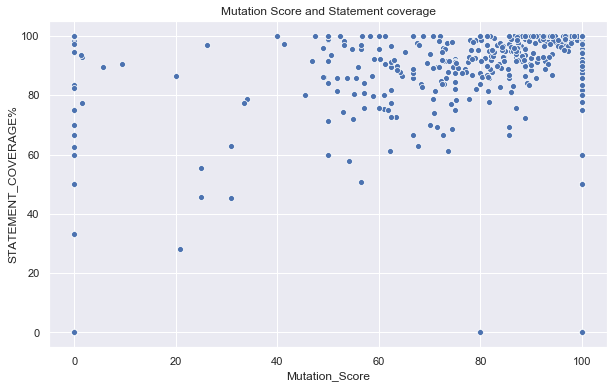

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="Mutation_Score", y="STATEMENT_COVERAGE", data=data)
plt.ylabel("STATEMENT_COVERAGE%")
plt.title("Mutation Score and Statement coverage")

##### Corelation:

In [11]:
data[['Mutation_Score','STATEMENT_COVERAGE']].corr(method ='spearman')

,Mutation_Score,STATEMENT_COVERAGE
Mutation_Score,1.000000,0.366781
STATEMENT_COVERAGE,0.366781,1.000000


The rationale is that test suites with higher Statement coverage show better test suite effectiveness.

#### 2. Metric 3 and 2
Mutation Score and Branch Coverage

Text(0.5, 1.0, 'Mutation Score and Branch Coverage')

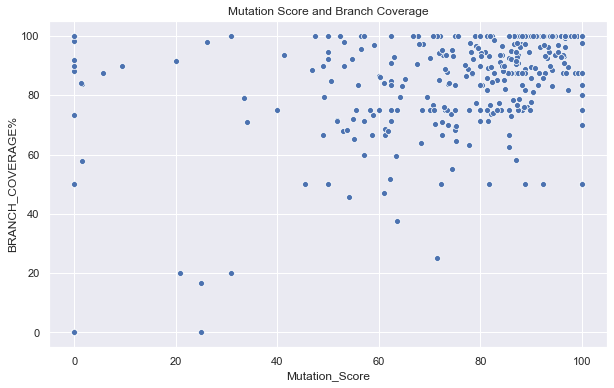

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="Mutation_Score", y="BRANCH_COVERAGE", data=data)
plt.ylabel("BRANCH_COVERAGE%")
plt.title("Mutation Score and Branch Coverage")

Corelation:

In [13]:
data[['Mutation_Score','BRANCH_COVERAGE']].corr(method ='spearman')

,Mutation_Score,BRANCH_COVERAGE
Mutation_Score,1.000000,0.378387
BRANCH_COVERAGE,0.378387,1.000000


The rationale is that test suites with higher Branch coverage show better test suite effectiveness.